# Understand audio data and concepts
## Audio data
### We need to first get a better understanding of our audio data. Here, we'll look at some key concepts and features of audio data.

### An audio signal is the vibration generated when sound passes through air. For audio, when sound is captured from a microphone, it's in analog form. The analog sound is converted to digital sound format by sampling at consistent intervals of time. The number of audio data points recorded every second is called the sample rate.

### The higher the sample rate, the higher the quality of the sound. However, after a certain point, the human ear can't detect the difference.
### The average sound sample rate is 48 kilohertz (KHz) or 48,000 samples per second. The dataset we'll be using in this module was sampled at 16 KHz, so our sample rate is 16,000.


### When the audio is sampled, the frequency of the sound is the number of times per second that a sound wave repeats itself. The amplitude is how loud the audio is. We can take our sample rate and frequency, and represent the signal visually. This visual signal can be represented as a waveform, which is the signal representation over time in a graphical format. The audio can be recorded in different channels. For example, stereo recordings have two channels, right and left.

### Now let's take a moment to understand how we might want to parse out a file. For example, if you have longer audio files, you might want to split it out into frames, or sections, of the audio to be classified individually. For this dataset, we don't need to set any frames of our audio samples, because each sample is only one second and one word. Another processing step might be an offset, which means the number of frames from the start of the file to begin data loading.

## Get set up with TorchAudio
### TorchAudio is a library that is part of the PyTorch ecosystem. It has I/O functionality, popular open datasets, and common audio transformations that we'll need to build our model. We will use this library to work with our audio data.

### Let's get started! First, we'll import the packages needed:

In [1]:
!pip install -r https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/audio-pytorch/install-packages.txt

     |████████████████████████████████| 2.9 MB 1.4 MB/s eta 0:00:01


In [3]:
!pip install matplotlib

  Using cached matplotlib-3.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.9 MB)
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)
     |████████████████████████████████| 1.6 MB 1.0 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [4]:
# import the packages
import os
import torchaudio
import IPython.display as ipd
import matplotlib.pyplot as plt

## Get the speech commands dataset
### PyTorch has a variety of sample datasets available, which is helpful when you're trying to learn and play around with different audio models. We will use the speech commands sample dataset, and download the full dataset in a local directory. Note that we're only using the yes and no classes to create a binary classification model.



### Create a data folder

In [5]:
default_dir = os.getcwd()
folder = 'data'
print(f'Data directory will be: {default_dir}/{folder}')

if os.path.isdir(folder):
    print("Data folder exists.")
else:
    print("Creating folder.")
    os.mkdir(folder) 

Data directory will be: /home/nikhil/pytorch_practice/data
Data folder exists.


### Download the dataset to the data folder

### We'll use torchaudio to download the dataset files to a local folder. PyTorch provides multiple sample image, text, and audio datasets. We'll be using the SPEECHCOMMANDS dataset from the torchaudio library.

In [7]:
trainset_speechcommands = torchaudio.datasets.SPEECHCOMMANDS(f'./{folder}/', download=True)

100%|██████████| 2.26G/2.26G [49:18<00:00, 821kB/s]    


### Visualize the classes available in the dataset

### There are 36 audio classes in the speech commands dataset, each sampled at 16 KHz. Let's print the different commands available. The two classes we'll be using are the yes and no commands.

In [8]:
os.chdir(f'./{folder}/SpeechCommands/speech_commands_v0.02/')
labels = [name for name in os.listdir('.') if os.path.isdir(name)]
# back to default directory
os.chdir(default_dir)
print(f'Total Labels: {len(labels)} \n')
print(f'Label Names: {labels}')

Total Labels: 36 

Label Names: ['off', 'right', 'visual', 'backward', 'eight', 'three', 'follow', 'no', 'forward', 'down', 'house', 'up', 'wow', 'happy', 'marvin', 'cat', 'bed', 'stop', 'learn', 'bird', 'one', 'six', 'yes', 'dog', 'nine', 'tree', 'four', 'two', '_background_noise_', 'seven', 'go', 'left', 'sheila', 'on', 'zero', 'five']


## Convert the sound to tensor
### You likely have used a wave file before. It's one format in which we save our digital representation of our analog audio to be shared and played. The speech commands dataset that we will be using in this tutorial is stored in wave files that are all one second or less.

### Let's load up one of the wave files and take a look at how the tensors for the waveform look. We're loading the files by using torchaudio.load, which loads an audio file into a torch.Tensor object. TorchAudio takes care of the implementation, so you don't need to worry about it. The torch.load function returns the waveform as a tensor, and an int of the sample_rate.

In [9]:
filename = "./data/SpeechCommands/speech_commands_v0.02/yes/00f0204f_nohash_0.wav"
waveform, sample_rate = torchaudio.load(filepath=filename, num_frames=3)
print(f'waveform tensor with 3 frames:  {waveform} \n')
waveform, sample_rate = torchaudio.load(filepath=filename, num_frames=3, frame_offset =2)
print(f'waveform tensor with 2 frame_offsets: {waveform} \n')
waveform, sample_rate = torchaudio.load(filepath=filename)
print(f'waveform tensor:  {waveform}' )

waveform tensor with 3 frames:  tensor([[0.0005, 0.0007, 0.0005]]) 

waveform tensor with 2 frame_offsets: tensor([[0.0005, 0.0004, 0.0007]]) 

waveform tensor:  tensor([[0.0005, 0.0007, 0.0005,  ..., 0.0008, 0.0008, 0.0007]])


## Plot the waveform
### Next, create a plot_audio function to display the waveform, and listen to a sample of each class.

In [10]:
def plot_audio(filename):
    waveform, sample_rate = torchaudio.load(filename)

    print("Shape of waveform: {}".format(waveform.size()))
    print("Sample rate of waveform: {}".format(sample_rate))

    plt.figure()
    plt.plot(waveform.t().numpy())

    return waveform, sample_rate

### The size of the audio is 1 x 16000. This means that it's 1 second long, at a sample rate of 16000. We can see the graphical waveform of the sound pattern captured, and play the audio for the yes command.

Shape of waveform: torch.Size([1, 16000])
Sample rate of waveform: 16000


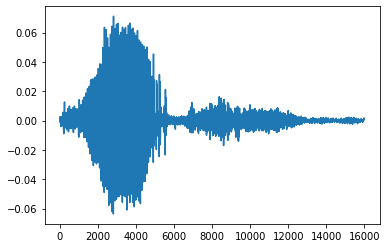

In [11]:
filename = "./data/SpeechCommands/speech_commands_v0.02/yes/00f0204f_nohash_0.wav"
waveform, sample_rate = plot_audio(filename)
ipd.Audio(waveform.numpy(), rate=sample_rate)